In [134]:
# Install Package
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Python libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score,classification_report
import xgboost as xgb
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import hvplot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


warnings.filterwarnings('ignore')

## Attrition dataset loading

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis (EDA)

### Let's check how many employees were left?

- The Employee attrition rate is 16%

No     1233
Yes     237
Name: Attrition, dtype: int64


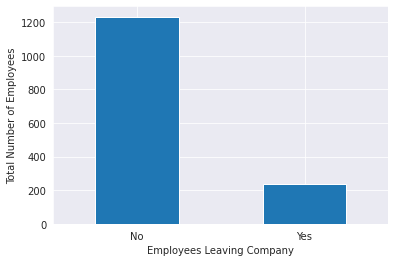

In [ ]:
## BarChart
print(df["Attrition"].value_counts())
df["Attrition"].value_counts().plot(kind="bar")
plt.xlabel('Employees Leaving Company')
plt.ylabel('Total Number of Employees')
plt.xticks(rotation=0);

Text(0.5, 1.0, 'Attrition Distribution')

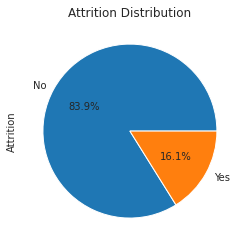

In [ ]:
## PieChart
df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Attrition Distribution')

### Attrition distribution by Age

- The organization has 1470 employees with an average age of 35
- The majority of people who left the company are around 25-32 yrs of age. 
- And after the 35 yrs age, the chances of leaving the company is less even if the majority of people in the company belong to this age group

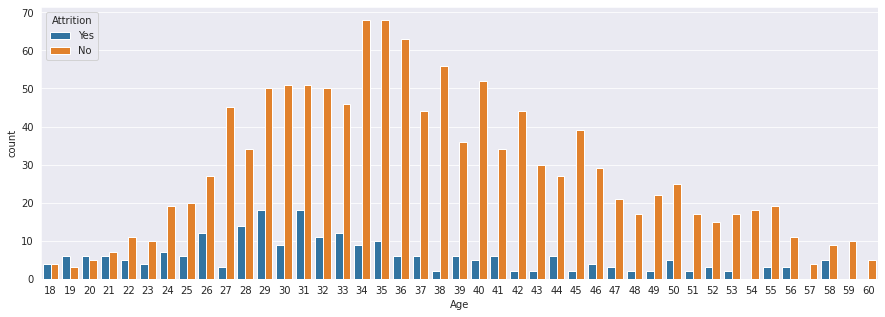

In [ ]:
plt.figure(figsize = [15,5])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)

### Attrition by Monthly Income

- The employees, who have low income, have high attrition rate.

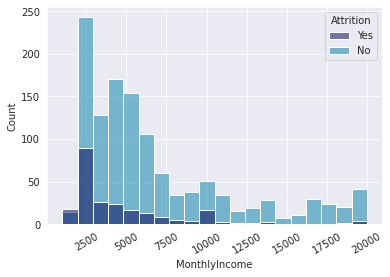

In [ ]:
sns.set_style('darkgrid')
ax = sns.histplot(x='MonthlyIncome', hue='Attrition', data=df, palette='ocean')
plt.sca(ax)
plt.xticks(rotation = 30)
plt.show()

### Attrition per Marital Status

- As expected, the attrition rate for "Single" employees is higher than the Married and Divorced employees.

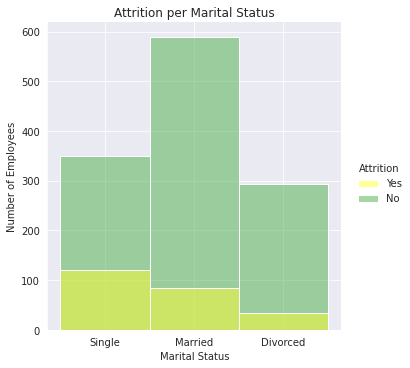

In [ ]:
sns.set_style('darkgrid')
sns.displot(x="MaritalStatus", data=df, hue='Attrition', height=5, palette='Set1_r');
plt.title('Attrition per Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
sns.despine()

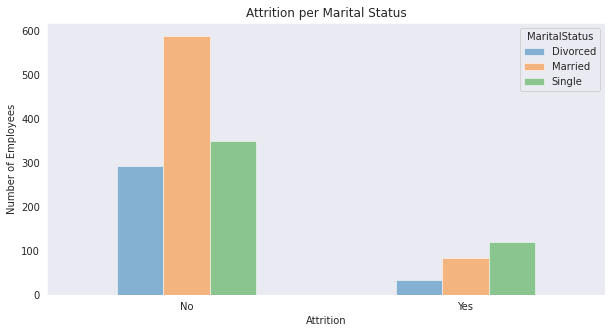

In [ ]:
colors = ['pink', 'lightblue', 'lightgreen']
pd.crosstab(df.Attrition, [df.MaritalStatus]).plot(kind="bar", figsize=(10, 5),alpha=0.5);
plt.title('Attrition per Marital Status')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0);
plt.grid(None)

### How does Commute Distance Impact Attrition

- Mean distance from home for the employees who left is higher than for those who stayed by 1.6 miles. After 12 miles, the employee tend to leave. However the distributions are quite similar.

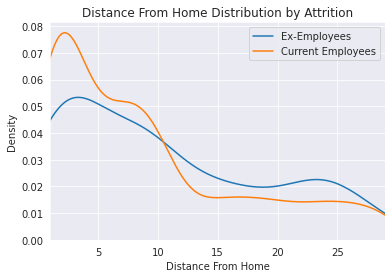

In [ ]:
sns.kdeplot(
    data = df[df["Attrition"] == "Yes"],
    x = "DistanceFromHome",
    label = "Ex-Employees"
)

sns.kdeplot(
    data = df[df["Attrition"] == "No"],
    x = "DistanceFromHome",
    label = "Current Employees"
)
plt.xlim(1, 29)
plt.legend()
plt.xlabel("Distance From Home")
plt.ylabel("Density")
plt.title("Distance From Home Distribution by Attrition")
plt.show()

### How Workplace effects Attrition ?

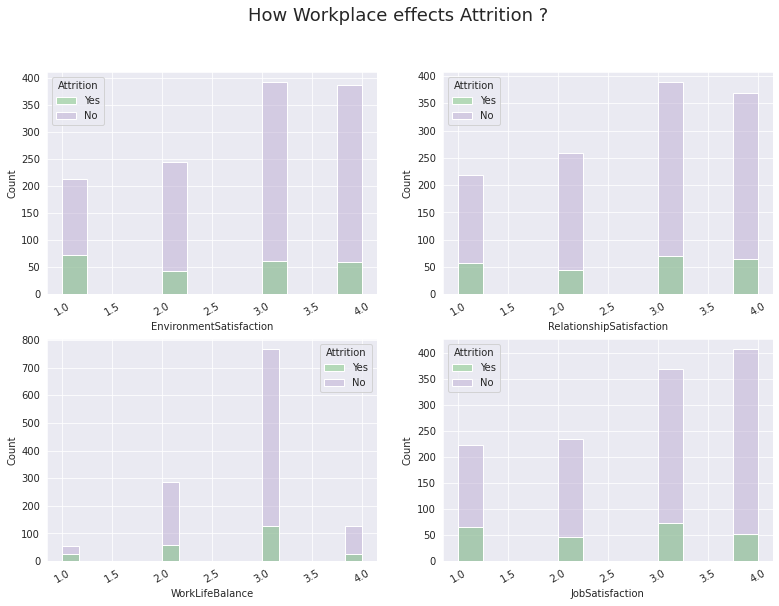

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(13, 9))
plt.suptitle('How Workplace effects Attrition ?', fontsize= 18)
sns.set_style('darkgrid')

ax1 = sns.histplot(x='EnvironmentSatisfaction', hue = 'Attrition', data=df, ax=axs[0, 0], palette='Accent')
ax2 = sns.histplot(x='RelationshipSatisfaction', hue = 'Attrition', data=df, ax=axs[0, 1], palette='Accent')
ax3 = sns.histplot(x='WorkLifeBalance', hue = 'Attrition', data=df, ax=axs[1, 0], palette='Accent')
ax4 = sns.histplot(x='JobSatisfaction', hue = 'Attrition', data=df, ax=axs[1, 1], palette='Accent')

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 30)
    
plt.show()

1. Environment Satisfaction : No significance difference of attrition between worker with lowest and highest environment satisfaction
2. Relationship Satisfaciton : No significance difference of attrition between worker with lowest and highest Relationship satisfaction
3. Work Life Balance : Surprisingly highest attrition came from woker with high work life balance score
4. Job Satisfaction : No significance difference of attrition between worker with lowest and highest Job Satisfaction

### Was the work not challenging for the Employee?

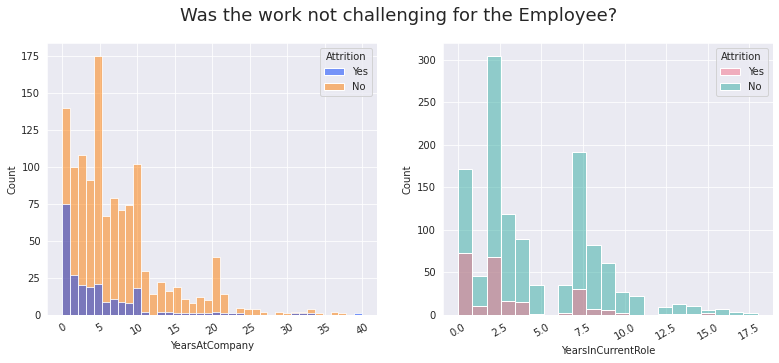

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1,figsize=(13, 5))
plt.suptitle('Was the work not challenging for the Employee?', fontsize= 18)
sns.set_style('darkgrid')

ax1 = sns.histplot(x='YearsAtCompany', hue = 'Attrition', data=df, ax=axs[0], palette='bright')
ax2 = sns.histplot(x='YearsInCurrentRole', hue = 'Attrition', data=df, ax=axs[1], palette='husl')

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 30)
    
plt.show()

1. Years at Company : Attrition was significantly high on relatively new worker
2. Years at Current Role : Attrtition was significantly high on woker with 0 & 2.5 years at currently

**Identify individuals who have been in a position for a substantial amount of time. The average time a person spends in a role in our organization is around 7 years. We can see that there are some individuals who have been in the same role for more than 15, presenting an opportunity for further investigation.**

In [ ]:
## Creating traget variable in binary form (0,1)
df['Attrition_Num'] = np.where(df['Attrition'] == 'Yes',1,0)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,0


In [ ]:
def CategoricalVariables_targetPlots(df1, segment_by,invert_axis = False, target_var = "Attrition_Num"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df1,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df1,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + "Attrition" + " vs " + segment_by)
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df1,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df1,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

### Attrition by Education Field

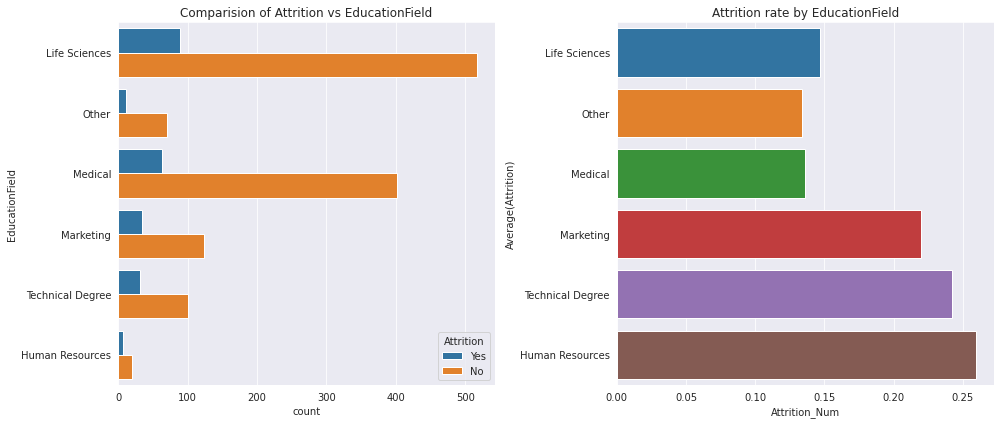

In [ ]:
CategoricalVariables_targetPlots(df,'EducationField',invert_axis=True)

- In the company, there are more employees belong from "Life Sciences" education backgroud
- But Employees' with Education Field of "Human Resources" followed by "Technical Degree" and "Marketing" have higher attrition.

### Attrition By Education level

<AxesSubplot:ylabel='Education'>

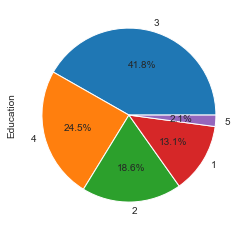

In [ ]:
df_yes = df.query("Attrition == 'Yes'") #filter the data of employees who left the company
df_yes.Education.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

- EducationLevel: 1. Below College; 2. College; 3. Bachelor; 4. Master; 5. Doctor
- Majority of the employees who left the company, had Bachelor and Master degree. Attrition rate for Bachelor Degree Employees is 42% followed by Master Degree around 24%

### Attrition by Education level and Education Field

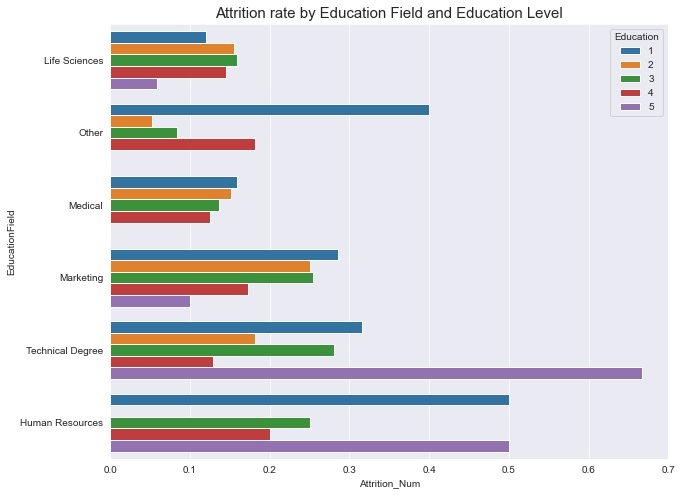

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "Attrition_Num", hue="Education", data=df,errorbar=None)
plt.title("Attrition rate by Education Field and Education Level", fontsize = 15)
plt.show()

- In "Human Resources" and "Technical Degree", the education level is highest.
- Employees with "Bachelor Degree" left the company most.

### Attritiob by "JobRole"

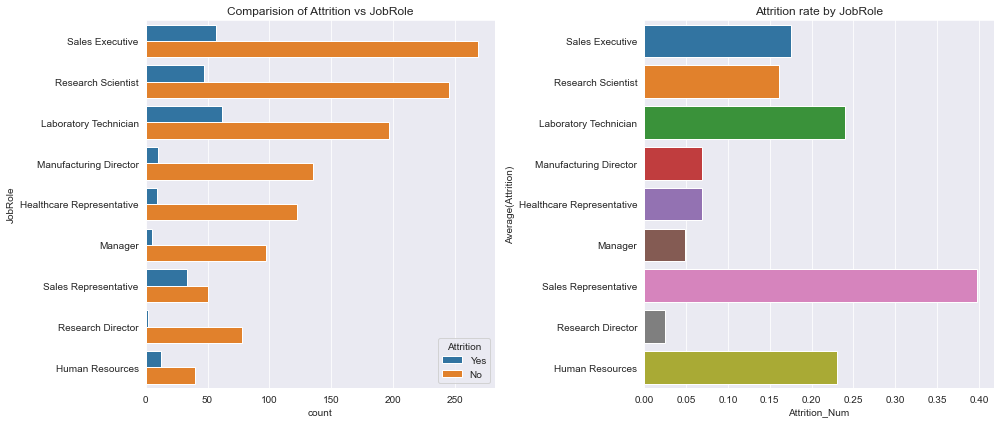

In [ ]:
CategoricalVariables_targetPlots(df,'JobRole',invert_axis=True)

- Employees' in "Sales Executive" job role are in majority.
- However, Employees' with "Sales Representative" job role have higher attrition rate as 40%.

### Attrition by "Department"

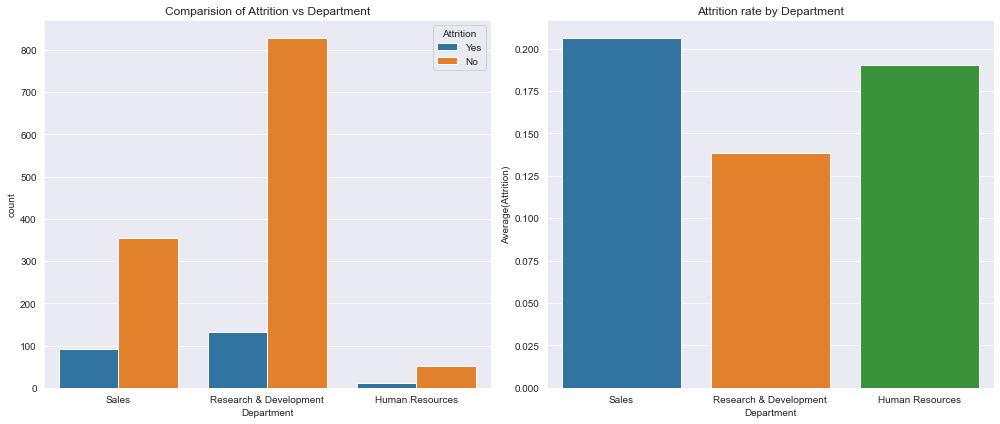

In [ ]:
CategoricalVariables_targetPlots(df,'Department',invert_axis=False)

- "Sales" Department has seen higher attrition about 20% followed by HR around 18%

### Attrition by "Department" and "JobRole"

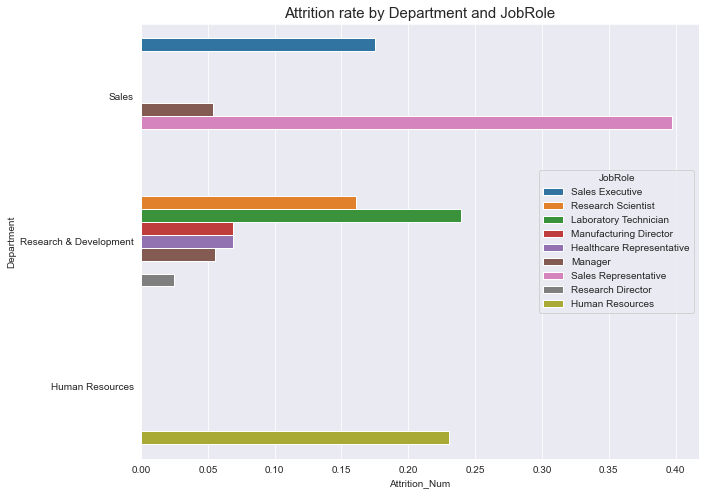

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y = "Department", x = "Attrition_Num", hue="JobRole", data=df,errorbar=None)
plt.title("Attrition rate by Department and JobRole", fontsize = 15)
plt.show()

### Attrition by "OverTime" working

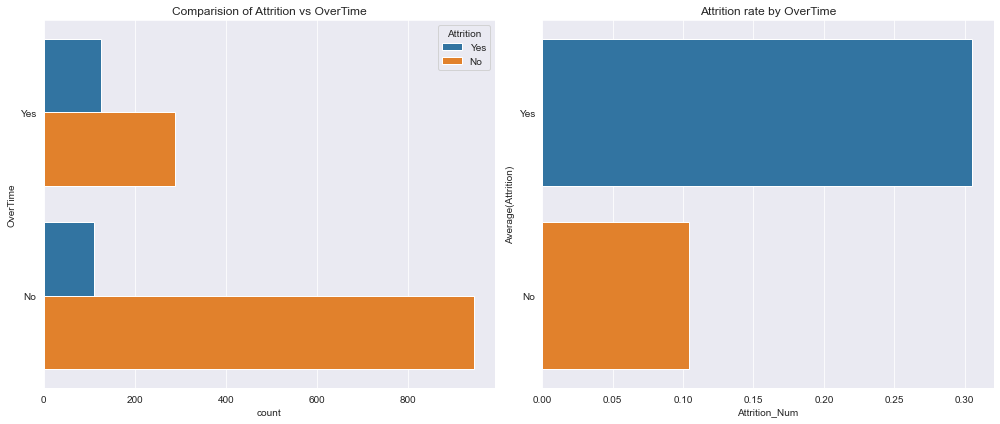

In [ ]:
CategoricalVariables_targetPlots(df,'OverTime',invert_axis=True)

- More than 30% of employee's who worked overtime has left the company, where as 90% of employee's who have not experienced overtime, have not left the company. Therefore overtime is a strong indicator of attrition

### Attrition by "Gender"

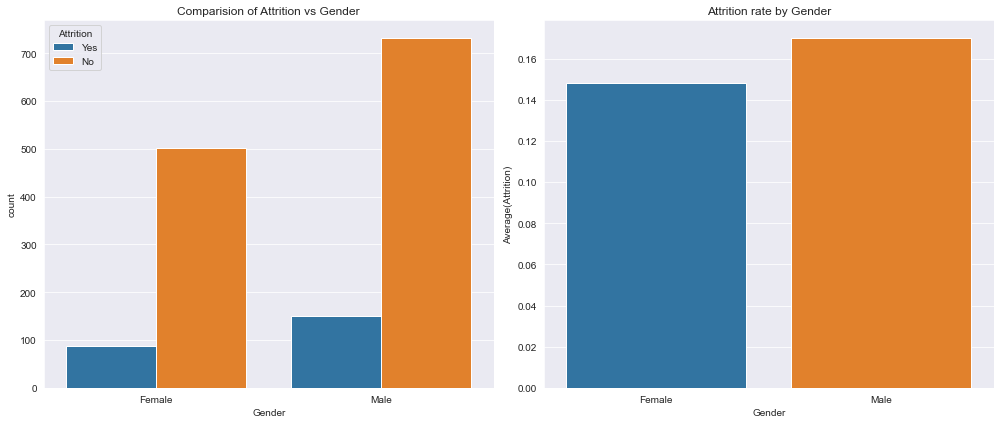

In [ ]:
CategoricalVariables_targetPlots(df,'Gender',invert_axis=False)

- The count for leaving the company is slighly more for Male Employees as compared to Female however, Male population is larger than female population in the company.
- Attrition is not getting effected by "Gender" factor as much.

### Attrition based on "WorkLife" balance

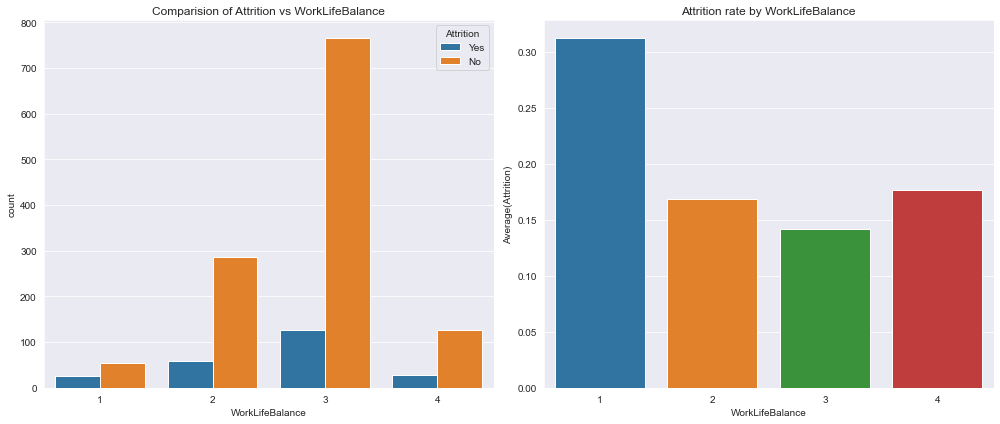

In [ ]:
CategoricalVariables_targetPlots(df,'WorkLifeBalance',invert_axis=False)

- WorkLifeBalance = 1: Bad, 2: Need to be Better, 3: Good, 4: Best
- Majority of Employees have "Good" WorkLifeBalance. 
- Surprisingly the employees' having "Best" WorkLife is leaving the most.

### Attrition by "TotalYears worked" in Company and "WorkLifeBalance"

Text(0.5, 1.0, 'Attrition by WorkingYears and WorkLifeBalance')

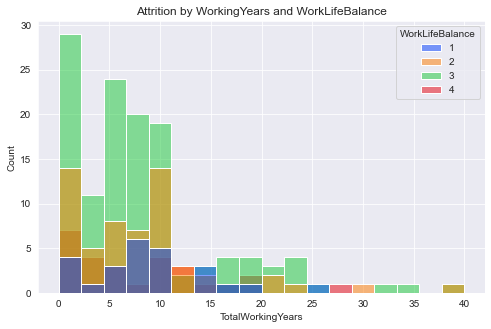

In [ ]:
plt.figure(figsize = [8,5])
sns.histplot(x = 'TotalWorkingYears', hue = 'WorkLifeBalance', data = df_yes, palette='bright')
plt.title('Attrition by WorkingYears and WorkLifeBalance', fontsize = 12)

- Most of the employees who left the company worked for 0-2 years followed by the 4.5-6 years but had "good" work life

### Attrition by "JobInvolvement"

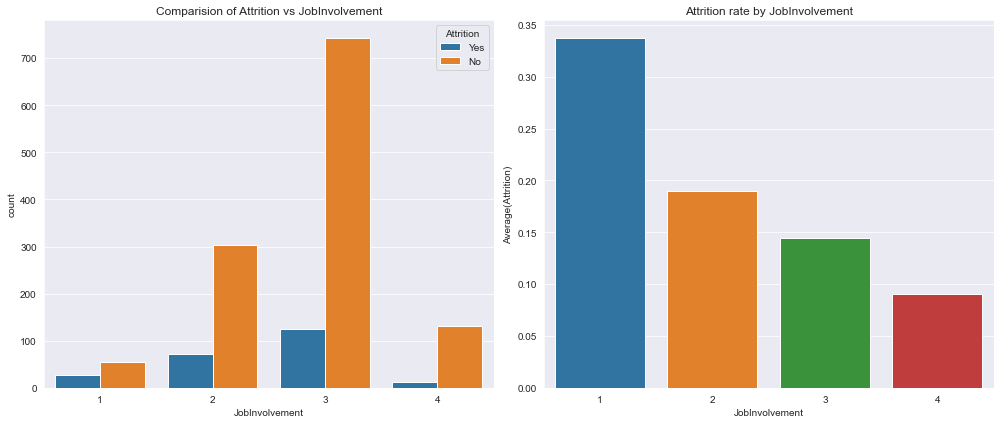

In [ ]:
CategoricalVariables_targetPlots(df,'JobInvolvement',invert_axis=False)

- JobInvolvement:  1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High'
- In the total data set, 59% people have "high" job involvement whereas 25% have medium involvement 
rate
- From above plot we can observe that around 50% of people in low job involvement (level 1 & 2) 
have left the company.
- Even the people who have high job involvement have higher attrition rate around 15% in that 
category have left company.

### Attrition by "WorkExperience"

1    98
0    23
7    17
4    17
6    16
5    16
2    16
3    16
9    12
8     6
Name: NumCompaniesWorked, dtype: int64


Text(0.5, 1.0, 'Attrition by Work Experience')

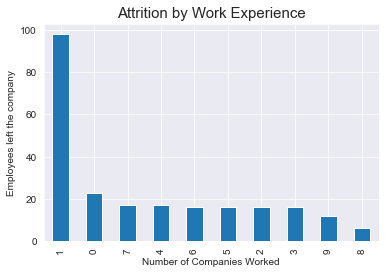

In [ ]:
print(df_yes["NumCompaniesWorked"].value_counts())
df_yes["NumCompaniesWorked"].value_counts().plot(kind="bar")
plt.xlabel('Number of Companies Worked')
plt.ylabel('Employees left the company')
plt.title('Attrition by Work Experience', fontsize = 15)

- Employees, having 1 year experience, left the company most followed by having no experience.

### Attrition by "Work Promotion"

0     110
1      49
2      27
7      16
3       9
6       6
4       5
9       4
15      3
13      2
11      2
5       2
10      1
14      1
Name: YearsSinceLastPromotion, dtype: int64


Text(0.5, 1.0, 'Attrition By Promotion')

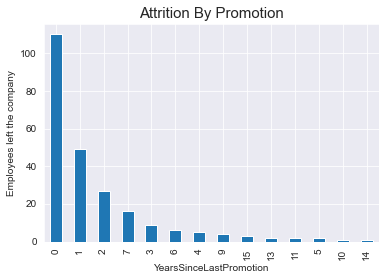

In [ ]:
print(df_yes["YearsSinceLastPromotion"].value_counts())
df_yes["YearsSinceLastPromotion"].value_counts().plot(kind="bar")
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Employees left the company')
plt.title('Attrition By Promotion', fontsize = 15)

## Data engineering

### **Remove uni-value variable**

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### **Using both 'Label encoder' and 'One-Hot encoder' to encode the categorical var with numerical value**

In [ ]:
df1= df.copy()
Attrition_le = LabelEncoder()
BusinessTravel_le = LabelEncoder()
Gender_le = LabelEncoder()
OverTime_le = LabelEncoder()
onehot = OneHotEncoder(drop='first',sparse=False)


In [ ]:
df1['Attrition'] = Attrition_le.fit_transform(df['Attrition'])
df1['BusinessTravel'] = BusinessTravel_le.fit_transform(df['BusinessTravel'])
df1['Gender'] = Gender_le.fit_transform(df['Gender'])
df1['OverTime'] = OverTime_le.fit_transform(df['OverTime'])

In [ ]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
cate=df1[['Department','EducationField','JobRole','MaritalStatus']]
cate = onehot.fit_transform(cate)
cate = pd.DataFrame(cate, columns = onehot.get_feature_names_out())
cate

,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df1= pd.concat([df1, cate], axis = 1)
df1.drop(['Department','EducationField','JobRole','MaritalStatus'],axis="columns", inplace=True)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,2,0,94,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,1,279,8,1,3,1,61,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,2,1373,2,2,4,1,92,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1,1392,3,4,4,0,56,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,2,591,2,1,1,1,40,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### **Correlation and plots**

In [ ]:
round(abs(df1.corr()['Attrition']*100).sort_values(ascending=False), 2)
 

Attrition                            100.00
OverTime                              24.61
MaritalStatus_Single                  17.54
TotalWorkingYears                     17.11
JobLevel                              16.91
YearsInCurrentRole                    16.05
MonthlyIncome                         15.98
Age                                   15.92
JobRole_Sales Representative          15.72
YearsWithCurrManager                  15.62
StockOptionLevel                      13.71
YearsAtCompany                        13.44
JobInvolvement                        13.00
JobSatisfaction                       10.35
EnvironmentSatisfaction               10.34
JobRole_Laboratory Technician          9.83
MaritalStatus_Married                  9.10
JobRole_Research Director              8.89
Department_Research & Development      8.53
JobRole_Manager                        8.33
JobRole_Manufacturing Director         8.30
Department_Sales                       8.09
DistanceFromHome                

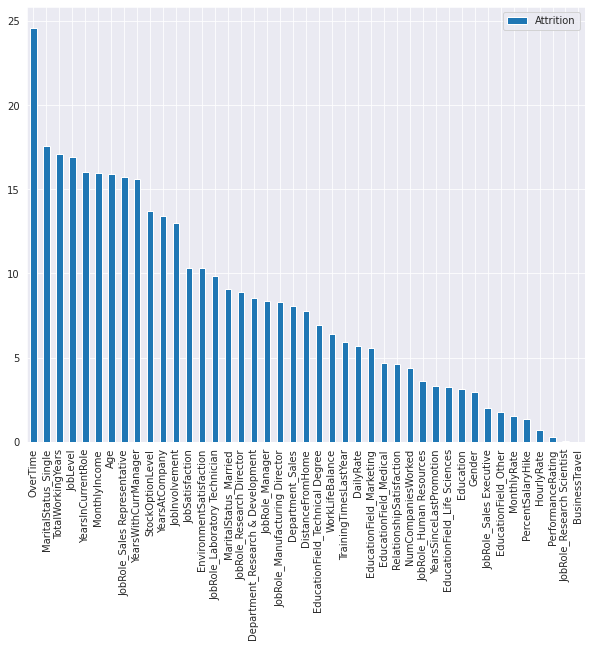

In [ ]:
pd.DataFrame(abs(df1.corr()['Attrition'].drop('Attrition')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

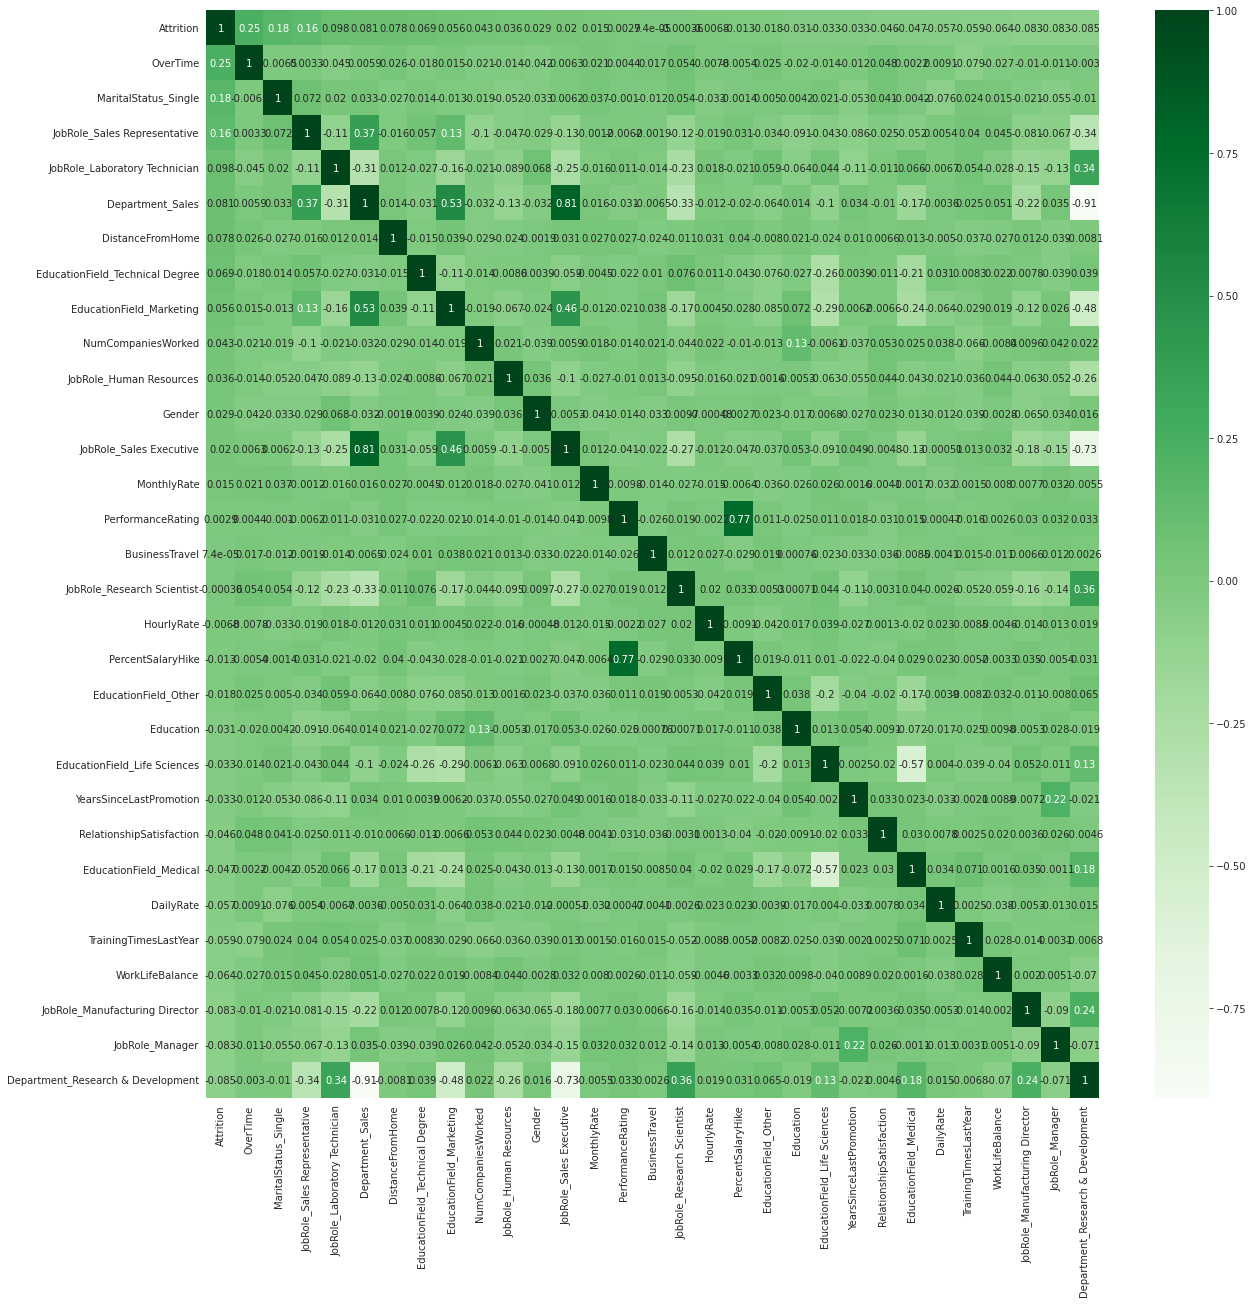

In [ ]:
col = df1.corr().nlargest(31, "Attrition").Attrition.index
plt.figure(figsize=(20, 20))
sns.heatmap(df1[col].corr(), annot=True, cmap='Greens', annot_kws={"size":10})

### VIF (Variance Inflation Factor)
- To check the multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.

In [ ]:
def compute_vif(considered_features):
    
    X = considered_features
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

df3=df1.copy()
df3.drop('Attrition', axis=1)

#df2.drop(['Attrition','Department_Research & Development','EducationField_Life Sciences','JobRole_Sales Executive','JobLevel'], axis="columns", inplace=True)
compute_vif(df3).sort_values('VIF', ascending=False)

,Variable,VIF
27,Department_Research & Development,44.057653
28,Department_Sales,43.974556
29,EducationField_Life Sciences,24.153676
31,EducationField_Medical,21.708560
12,MonthlyIncome,18.115003
40,JobRole_Sales Executive,14.713543
10,JobLevel,14.140154
30,EducationField_Marketing,10.902053
33,EducationField_Technical Degree,8.871698
34,JobRole_Human Resources,7.264079


### **Feature scaling using 'StandardScaler' and train-test split**

In [ ]:
y = df1.Attrition
X = df1.drop('Attrition', axis=1)
#X=df1.drop(['Department_Research & Development','EducationField_Life Sciences','JobRole_Sales Executive','JobLevel'], axis="columns", inplace=True)
#y = df1.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [ ]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")



In [ ]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")


===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


## Model Building and Interpretation

### 1. Logistic Regression

### Baseline Model

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

y_test_pred = lr.predict(X_test_std)
y_train_pred = lr.predict(X_train_std)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, y_train_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, y_train_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_test, y_test_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_test, y_test_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")



TRAINIG RESULTS: 
CONFUSION MATRIX:
[[841  22]
 [106  60]]
balanced accuracy score:
0.6680
AUC score:
0.6680
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.888068    0.731707  0.875607     0.809887      0.862843
recall       0.974508    0.361446  0.875607     0.667977      0.875607
f1-score     0.929282    0.483871  0.875607     0.706576      0.857427
support    863.000000  166.000000  0.875607  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 38  33]]
balanced accuracy score:
0.7229
AUC score:
0.7229
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.905237   0.825000  0.897959    0.865118      0.892319
recall       0.981081   0.464789  0.897959    0.722935      0.897959
f1-score     0.941634   0.594595  0.897959    0.768114      0.885762
support    370.000000  71.000000  0.897959  441.000000    441.000000


### Class Weight for LR model

In [ ]:
lr_balance = LogisticRegression(class_weight='balanced')
lr_balance.fit(X_train_std, y_train)

y_test_pred = lr_balance.predict(X_test_std)
y_train_pred = lr_balance.predict(X_train_std)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, y_train_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, y_train_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_test, y_test_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_test, y_test_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[653 210]
 [ 32 134]]
balanced accuracy score:
0.7819
AUC score:
0.7819
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.953285    0.389535   0.76482     0.671410       0.86234
recall       0.756663    0.807229   0.76482     0.781946       0.76482
f1-score     0.843669    0.525490   0.76482     0.684580       0.79234
support    863.000000  166.000000   0.76482  1029.000000    1029.00000
TESTING RESULTS: 
CONFUSION MATRIX:
[[280  90]
 [ 12  59]]
balanced accuracy score:
0.7939
AUC score:
0.7939
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.958904   0.395973  0.768707    0.677439      0.868274
recall       0.756757   0.830986  0.768707    0.793871      0.768707
f1-score     0.845921   0.536364  0.768707    0.691143      0.796083
support    370.000000  71.000000  0.768707  441.000000    441.000000


### GridSearchCV for LR

class_weight=[{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

     {0: 100, 1: 1000}

In [ ]:
# define weight hyperparameter

solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']
penalty = ['l1','l2','none','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
class_weight=[{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000},'balanced' ]


grid = dict(solver=solvers,penalty=penalty,C=c_values,class_weight=class_weight)
#cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 22)
# define model
lg3 = LogisticRegression()
# define evaluation procedure
grid = GridSearchCV(lg3,grid,scoring="balanced_accuracy", cv=5, n_jobs=-1, refit=True)
grid.fit(X_train_std, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.7547047531807044 with param: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr2 = LogisticRegression(solver='liblinear',class_weight='balanced',penalty='l1',C=10)
lr2.fit(X_train_std, y_train)

y_test_pred = lr2.predict(X_test_std)
y_train_pred = lr2.predict(X_train_std)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, y_train_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, y_train_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_test, y_test_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_test, y_test_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[652 211]
 [ 33 133]]
balanced accuracy score:
0.7784
AUC score:
0.7784
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.951825    0.386628  0.762877     0.669226      0.860646
recall       0.755504    0.801205  0.762877     0.778354      0.762877
f1-score     0.842377    0.521569  0.762877     0.681973      0.790624
support    863.000000  166.000000  0.762877  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[278  92]
 [ 12  59]]
balanced accuracy score:
0.7912
AUC score:
0.7912
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.958621   0.390728  0.764172    0.674675      0.867191
recall       0.751351   0.830986  0.764172    0.791169      0.764172
f1-score     0.842424   0.531532  0.764172    0.686978      0.792371
support    370.000000  71.000000  0.764172  441.000000    441.000000


### Best one for LR!!!

In [ ]:
# define weight hyperparameter

solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']
penalty = ['l1','l2','none','elasticnet']
c_values = [100, 10, 1.0, 0.1,0.01]
class_weight=['balanced' ]
max_iter=[500,100,10,50,200]

grid = dict(solver=solvers,penalty=penalty,C=c_values,class_weight=class_weight,max_iter=max_iter)
#cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 22)
# define model
lg3 = LogisticRegression()
# define evaluation procedure
grid = GridSearchCV(lg3,grid,scoring="balanced_accuracy", cv=5, n_jobs=-1, refit=True)
grid.fit(X_train_std, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.7213384247734216 with param: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
lr3 = LogisticRegression(solver='liblinear',class_weight='balanced',penalty='l2',C=0.01,max_iter=500)
lr3.fit(X_train_std, y_train)

y_test_lr = lr3.predict(X_test_std)
y_train_lr = lr3.predict(X_train_std)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, y_train_lr, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_lr)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, y_train_lr):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, y_train_lr):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_lr, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_lr)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_test, y_test_lr):.4f}")
print(f'AUC score:\n{roc_auc_score(y_test, y_test_lr):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")



TRAINIG RESULTS: 
CONFUSION MATRIX:
[[599 264]
 [ 27 139]]
balanced accuracy score:
0.7657
AUC score:
0.7657
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.956869    0.344913  0.717201     0.650891      0.858147
recall       0.694090    0.837349  0.717201     0.765720      0.717201
f1-score     0.804567    0.488576  0.717201     0.646572      0.753591
support    863.000000  166.000000  0.717201  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[265 105]
 [  9  62]]
balanced accuracy score:
0.7947
AUC score:
0.7947
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.967153   0.371257  0.741497    0.669205      0.871215
recall       0.716216   0.873239  0.741497    0.794728      0.741497
f1-score     0.822981   0.521008  0.741497    0.671995      0.774364
support    370.000000  71.000000  0.741497  441.000000    441.000000


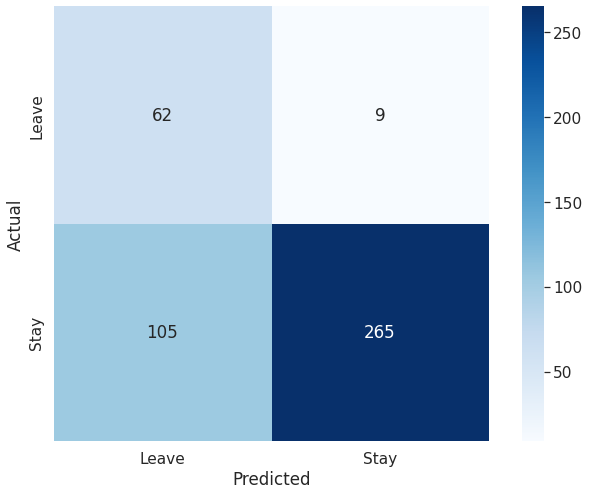

In [ ]:
logreg_conf_matrix = confusion_matrix(y_test,y_test_lr)
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(logreg_conf_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

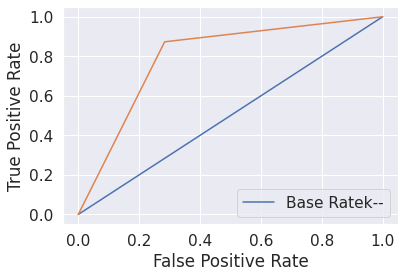

In [ ]:
plot_roc_curve(y_test, y_test_lr)

In [ ]:
pd.DataFrame(lr3.coef_[0], 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


,coef
OverTime,0.410212
YearsSinceLastPromotion,0.235371
MaritalStatus_Single,0.223430
DistanceFromHome,0.164326
JobRole_Sales Representative,0.163272
JobRole_Laboratory Technician,0.144743
NumCompaniesWorked,0.137699
EducationField_Technical Degree,0.082084
JobRole_Human Resources,0.079336
Gender,0.078954


In [ ]:
odds = np.exp(lr3.coef_[0])
LR_coef_odd=pd.DataFrame(odds, 
             X.columns, 
             columns=['LR_Odds_Ratio'])\
            .sort_values(by='LR_Odds_Ratio', ascending=False)


### 2. SVM (Support Vector Machine) Model

### Baseline Model

In [ ]:
svm = SVC()
svm.fit(X_train_std, y_train)

y_test_pred = svm.predict(X_test_std)
y_train_pred = svm.predict(X_train_std)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, y_train_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, y_train_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_test, y_test_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_test, y_test_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [103  63]]
balanced accuracy score:
0.6898
AUC score:
0.6898
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.893375    1.000000  0.899903     0.946687      0.910576
recall       1.000000    0.379518  0.899903     0.689759      0.899903
f1-score     0.943685    0.550218  0.899903     0.746952      0.880210
support    863.000000  166.000000  0.899903  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[369   1]
 [ 58  13]]
balanced accuracy score:
0.5902
AUC score:
0.5902
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864169   0.928571  0.866213    0.896370      0.874537
recall       0.997297   0.183099  0.866213    0.590198      0.866213
f1-score     0.925972   0.305882  0.866213    0.615927      0.826139
support    370.000000  71.000000  0.866213  441.000000    441.000000


### Class weight for SVM

In [ ]:
svm_balance= SVC(class_weight='balanced')
svm_balance.fit(X_train_std, y_train)

y_test_pred = svm_balance.predict(X_test_std)
y_train_pred = svm_balance.predict(X_train_std)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, y_train_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, y_train_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_test, y_test_pred):.4f}")
print(f'AUC score:\n{roc_auc_score(y_test, y_test_pred):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[791  72]
 [  7 159]]
balanced accuracy score:
0.9372
AUC score:
0.9372
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.991228    0.688312  0.923226     0.839770      0.942361
recall       0.916570    0.957831  0.923226     0.937201      0.923226
f1-score     0.952438    0.801008  0.923226     0.876723      0.928009
support    863.000000  166.000000  0.923226  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[327  43]
 [ 24  47]]
balanced accuracy score:
0.7729
AUC score:
0.7729
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.931624   0.522222  0.848073    0.726923      0.865711
recall       0.883784   0.661972  0.848073    0.772878      0.848073
f1-score     0.907074   0.583851  0.848073    0.745462      0.855035
support    370.000000  71.000000  0.848073  441.000000    441.000000


### Grid search for SVM

In [ ]:
#!!!!dont run! cost time!
# defining parameter range
C= [0.1, 1, 10, 50, 100, 1000] 
kernel=['linear']
#'poly', 'rbf', 'sigmoid',
class_weight=['balanced']
param_grid = dict(C=C,class_weight=class_weight,kernel=kernel) 
grid = GridSearchCV(SVC(), param_grid, n_jobs=-1,cv=5 ,scoring="balanced_accuracy", refit = True)
  
# fitting the model for grid search
grid.fit(X_train_std, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')


Best score: 0.701791534905766 with param: {'C': 10, 'class_weight': 'balanced', 'kernel': 'linear'}


### Best one for SVM!!!

In [ ]:
svm2= SVC(C=10,kernel='linear',class_weight='balanced')
svm2.fit(X_train_std, y_train)

y_test_svm = svm2.predict(X_test_std)
y_train_svm = svm2.predict(X_train_std)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, y_train_svm, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_svm)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, y_train_svm):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, y_train_svm):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_svm, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_svm)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_test, y_test_svm):.4f}")
print(f'AUC score:\n{roc_auc_score(y_test, y_test_svm):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")



TRAINIG RESULTS: 
CONFUSION MATRIX:
[[649 214]
 [ 31 135]]
balanced accuracy score:
0.7826
AUC score:
0.7826
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.954412    0.386819  0.761905     0.670616      0.862847
recall       0.752028    0.813253  0.761905     0.782640      0.761905
f1-score     0.841218    0.524272  0.761905     0.682745      0.790088
support    863.000000  166.000000  0.761905  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[276  94]
 [ 12  59]]
balanced accuracy score:
0.7885
AUC score:
0.7885
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.958333   0.385621  0.759637    0.671977      0.866128
recall       0.745946   0.830986  0.759637    0.788466      0.759637
f1-score     0.838906   0.526786  0.759637    0.682846      0.788655
support    370.000000  71.000000  0.759637  441.000000    441.000000


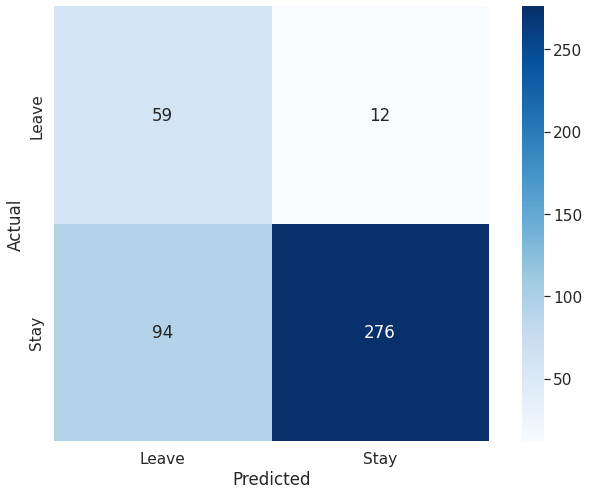

In [ ]:
logreg_conf_matrix = confusion_matrix(y_test,y_test_svm)
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(logreg_conf_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

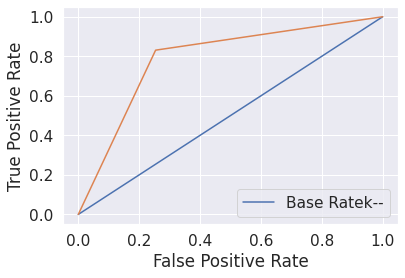

In [ ]:
plot_roc_curve(y_test, y_test_svm)

## 3. Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_scaled = RandomForestClassifier(
    n_estimators = 100, # number of trees
    max_depth= 5,       # parameters for the individual trees
    oob_score = True,   # whether or not to compute OOB score
    random_state = 22   # random state for reproducibility
)

#fit the model
rf_scaled.fit(X_train_std,y_train)

#out put the out-of-bagging score
rf_scaled.oob_score_

# Class probablities for every sample
rf_scaled.oob_decision_function_

# set the Threshold for predicting STAY
t = 0.5

# OOB predictions for each sample
rf_scaled_oob_preds = rf_scaled.oob_decision_function_[:,1] > t

print("RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, rf_scaled_oob_preds, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, rf_scaled_oob_preds)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, rf_scaled_oob_preds):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, rf_scaled_oob_preds):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

RESULTS: 
CONFUSION MATRIX:
[[861   2]
 [161   5]]
balanced accuracy score:
0.5139
AUC score:
0.5139
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.842466    0.714286  0.841594     0.778376      0.821788
recall       0.997683    0.030120  0.841594     0.513901      0.841594
f1-score     0.913528    0.057803  0.841594     0.485666      0.775481
support    863.000000  166.000000  0.841594  1029.000000   1029.000000


## **Dealing with imbalanced data**

### Method 1. use a different threshold: minority class proportion instead

In [ ]:
# Threshold for predicting attribution
t = 0.1612  # <--- different threshold! (237/1470=0.1612)

# OOB predictions for each sample
rf_scaled_oob_preds = rf_scaled.oob_decision_function_[:,1] > t


#with the threshold of t=0.1612, we run the report and see the metrics value
print("RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, rf_scaled_oob_preds, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, rf_scaled_oob_preds)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, rf_scaled_oob_preds):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, rf_scaled_oob_preds):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

RESULTS: 
CONFUSION MATRIX:
[[613 250]
 [ 51 115]]
balanced accuracy score:
0.7015
AUC score:
0.7015
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.923193    0.315068  0.707483     0.619131      0.825089
recall       0.710313    0.692771  0.707483     0.701542      0.707483
f1-score     0.802881    0.433145  0.707483     0.618013      0.743235
support    863.000000  166.000000  0.707483  1029.000000   1029.000000


0.18    0.711049
0.17    0.711046
0.21    0.703758
0.20    0.703640
0.16    0.703395
          ...   
0.72    0.500000
0.01    0.500000
0.03    0.500000
0.02    0.500000
1.00    0.500000
Length: 101, dtype: float64

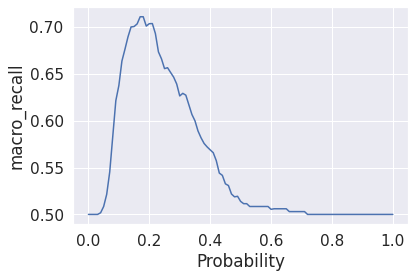

In [ ]:
#by changing the threshold values, we try to find the model with higher balanced accuracy

rf_scaled_thresholds = np.linspace(0, 1, 101)

thresholds = np.linspace(0, 1, 101)

rf_scaled_macro_recalls = []
for t in thresholds:
    # Compute predictions at that threshold
    rf_scaled_oob_preds = rf_scaled.oob_decision_function_[:,1] > t
    
    # Compute confusion matrix for those predictions
    rf_scaled_report = classification_report(y_train, rf_scaled_oob_preds, output_dict=True )
    
    # abstract the balance accuracy value
    rf_scaled_macro_recall = rf_scaled_report['macro avg']['recall']   
    
    # Add to our list
    rf_scaled_macro_recalls.append(rf_scaled_macro_recall)

#out put the graph and the list for the balance accuracy with differnt threshold
rf_scaled_macro_recalls_values = pd.Series(rf_scaled_macro_recalls, index = thresholds)
rf_scaled_macro_recalls_values.plot(xlabel = 'Probability', ylabel = 'macro_recall')
rf_scaled_macro_recalls_values.sort_values(ascending = False)

### Best RF!!!

In [ ]:
t = 0.18

# OOB predictions for each sample
rf_scaled_oob_preds = rf_scaled.oob_decision_function_[:,1] > t
rf_scaled_oob_preds

print("RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, rf_scaled_oob_preds, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, rf_scaled_oob_preds)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, rf_scaled_oob_preds):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, rf_scaled_oob_preds):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

RESULTS: 
CONFUSION MATRIX:
[[671 192]
 [ 59 107]]
balanced accuracy score:
0.7110
AUC score:
0.7110
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.919178    0.357860  0.756074     0.638519      0.828625
recall       0.777520    0.644578  0.756074     0.711049      0.756074
f1-score     0.842436    0.460215  0.756074     0.651325      0.780775
support    863.000000  166.000000  0.756074  1029.000000   1029.000000


In [ ]:
#list for the feature importance
columns=['importance']
rf_scaled_feature_importances = pd.DataFrame(rf_scaled.feature_importances_, index = X.columns,columns=columns).sort_values(by='importance',ascending = False)
rf_scaled_feature_importances

,importance
MonthlyIncome,0.095953
OverTime,0.094792
TotalWorkingYears,0.076566
Age,0.060620
JobLevel,0.048886
DistanceFromHome,0.047025
YearsAtCompany,0.044739
StockOptionLevel,0.044331
DailyRate,0.042185
HourlyRate,0.041789


Text(0.5, 0, 'Importance')

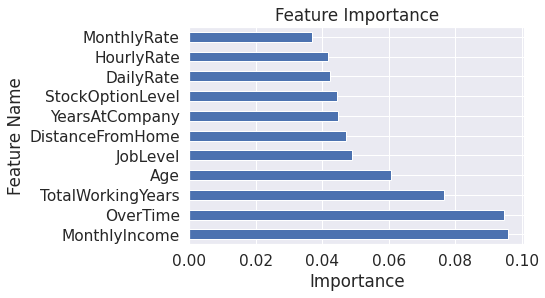

In [ ]:
# the graph for the feature importance
#rf_scaled_feature_importances['importance'].iloc[34:44].plot(kind="barh")
rf_scaled_feature_importances['importance'].iloc[0:11].plot(kind="barh")
plt.title("Feature Importance")
plt.ylabel("Feature Name")
plt.xlabel("Importance")

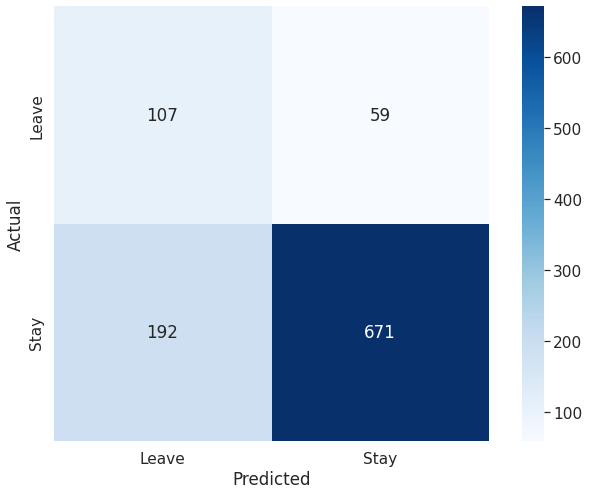

In [ ]:
logreg_conf_matrix = confusion_matrix(y_train, rf_scaled_oob_preds)
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(logreg_conf_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

### Method 2. Use Class weights

In [ ]:
rf_scaled_rf = RandomForestClassifier(
    n_estimators = 100, 
    max_depth= 5,       
    oob_score = True,   
    random_state = 22,  
    class_weight = 'balanced'  # <---- for imbalanced data
)

#fit the model
rf_scaled_rf.fit(X_train_std,y_train)

t = 0.5
rf_scaled_oob_preds = rf_scaled_rf.oob_decision_function_[:,1] > t
print("RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, rf_scaled_oob_preds, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, rf_scaled_oob_preds)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, rf_scaled_oob_preds):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, rf_scaled_oob_preds):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")

RESULTS: 
CONFUSION MATRIX:
[[770  93]
 [ 92  74]]
balanced accuracy score:
0.6690
AUC score:
0.6690
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.893271    0.443114  0.820214     0.668193      0.820651
recall       0.892236    0.445783  0.820214     0.669010      0.820214
f1-score     0.892754    0.444444  0.820214     0.668599      0.820432
support    863.000000  166.000000  0.820214  1029.000000   1029.000000


0.46    0.697619
0.38    0.695745
0.47    0.691365
0.42    0.690080
0.37    0.688558
          ...   
0.03    0.500000
0.02    0.500000
1.00    0.500000
0.14    0.499885
0.13    0.498147
Length: 101, dtype: float64

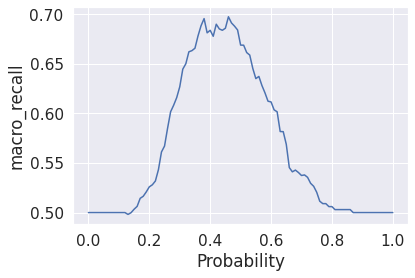

In [ ]:
#by changing the threshold values, we try to find the model with higher balanced accuracy
thresholds = np.linspace(0, 1, 101)

rf_scaled_macro_recalls = []
for t in thresholds:
    # Compute predictions at that threshold
    rf_scaled_oob_preds = rf_scaled_rf.oob_decision_function_[:,1] > t
    
    # Compute confusion matrix for those predictions
    rf_scaled_report = classification_report(y_train, rf_scaled_oob_preds, output_dict=True )
    
     # abstract the balance accuracy value
    rf_scaled_macro_recall = rf_scaled_report['macro avg']['recall']   
    
    # Add to our list
    rf_scaled_macro_recalls.append(rf_scaled_macro_recall)

#out put the graph and the list for the balance accuracy with differnt threshold
rf_scaled_macro_recalls_values = pd.Series(rf_scaled_macro_recalls, index = thresholds)
rf_scaled_macro_recalls_values.plot(xlabel = 'Probability', ylabel = 'macro_recall')
rf_scaled_macro_recalls_values.sort_values(ascending = False)

### Mehtod 3. Sample Weights for imbalanced data

In [ ]:
y.value_counts()

rf_scaled_sample_weight = pd.Series(1, index = y_train.index)

#set the sample weight of y_train==True approximately equals to the inverse of the churn rate.
rf_scaled_sample_weight[y_train == True] = 6

rf_scaled_rf = RandomForestClassifier(
    n_estimators = 100, 
    max_depth= 5,       
    oob_score = True,   
    random_state = 22,  
    # No more class_weight
)

#fit the model
rf_scaled_rf.fit(X_train_std,y_train, sample_weight = rf_scaled_sample_weight) # <-- add the sample weight here

t = 0.5
rf_scaled_oob_preds = rf_scaled_rf.oob_decision_function_[:,1] > t

#classification report
print("RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, rf_scaled_oob_preds, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, rf_scaled_oob_preds)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_train, rf_scaled_oob_preds):.4f}")
print(f'AUC score:\n{roc_auc_score(y_train, rf_scaled_oob_preds):.4f}')
print(f"CLASSIFICATION REPORT:\n{clf_report}")



RESULTS: 
CONFUSION MATRIX:
[[742 121]
 [ 79  87]]
balanced accuracy score:
0.6919
AUC score:
0.6919
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.903776    0.418269  0.805637     0.661023      0.825453
recall       0.859791    0.524096  0.805637     0.691944      0.805637
f1-score     0.881235    0.465241  0.805637     0.673238      0.814126
support    863.000000  166.000000  0.805637  1029.000000   1029.000000


0.50    0.691944
0.48    0.690666
0.49    0.689162
0.40    0.688677
0.39    0.688558
          ...   
0.05    0.500000
0.04    0.500000
0.03    0.500000
0.02    0.500000
1.00    0.500000
Length: 101, dtype: float64

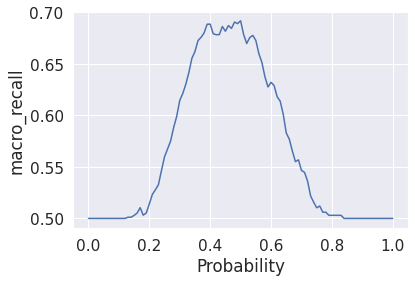

In [ ]:
#by changing the threshold values, we try to find the model with higher balanced accuracy
rf_scaled_macro_recalls = []
for t in thresholds:
    # Compute predictions at that threshold
    rf_scaled_oob_preds = rf_scaled_rf.oob_decision_function_[:,1] > t
    
    # Compute confusion matrix for those predictions
    rf_scaled_report = classification_report(y_train, rf_scaled_oob_preds, output_dict=True )
    
     # abstract the balance accuracy value
    rf_scaled_macro_recall = rf_scaled_report['macro avg']['recall']   
    
    # Add to our list
    rf_scaled_macro_recalls.append(rf_scaled_macro_recall)

#out put the graph and the list for the balance accuracy with differnt threshold
rf_scaled_macro_recalls_values = pd.Series(rf_scaled_macro_recalls, index = thresholds)
rf_scaled_macro_recalls_values.plot(xlabel = 'Probability', ylabel = 'macro_recall')
rf_scaled_macro_recalls_values.sort_values(ascending = False)

### Grid research based on the imbalanced dataset
To find the best parameters, we do the grid search for each parameters one by one.

In [ ]:
#grid search on 'n_estimators'
rfr_best = RandomForestClassifier() 
rf_param_grid1 ={'n_estimators':range(5,100,1)} 
rf_best = GridSearchCV(rfr_best, rf_param_grid1, cv=5,scoring="balanced_accuracy" ) 
rf_best.fit(X_train_std,y_train)
rf_best.best_params_

{'n_estimators': 5}

In [ ]:
#grid search on 'min_samples_split'
rf_param_grid2 = {'min_samples_split':range(2,100,1)} 
rf_best2 = GridSearchCV(rf_best.best_estimator_,param_grid = rf_param_grid2,cv = 5,scoring="balanced_accuracy") 
rf_best2.fit(X_train_std,y_train)
rf_best2.best_params_

{'min_samples_split': 8}

In [ ]:
#grid search on 'max_features'
rf_param_grid3 = {'max_features':range(5,43,1),} 
rf_best3 = GridSearchCV(rf_best.best_estimator_,param_grid = rf_param_grid3,cv = 5,scoring="balanced_accuracy") 
rf_best3.fit(X_train_std,y_train)
rf_best3.best_params_

{'max_features': 33}

In [ ]:
#grid search on 'max_depth'
rf_param_grid4 = {'max_depth':range(3,50,1)} 
rf_best4 = GridSearchCV(rf_best.best_estimator_,param_grid = rf_param_grid4,cv = 5,scoring="balanced_accuracy")
rf_best4.fit(X_train_std,y_train)
rf_best4.best_params_

{'max_depth': 41}

In [ ]:
rf = RandomForestClassifier( n_estimators = 5, max_depth= 41, oob_score = True, max_features = 33, min_samples_split = 8, random_state = 22)

#fit the model
rf.fit(X_train_std,y_train)
t = 0.5 
oob_preds = rf.oob_decision_function_[:,1] > t

#classification report
print("RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, rf_scaled_oob_preds, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, rf_scaled_oob_preds)}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")


RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [166   0]]
CLASSIFICATION REPORT:
                    0      1  accuracy    macro avg  weighted avg
precision    0.838678    0.0  0.838678     0.419339      0.703381
recall       1.000000    0.0  0.838678     0.500000      0.838678
f1-score     0.912262    0.0  0.838678     0.456131      0.765095
support    863.000000  166.0  0.838678  1029.000000   1029.000000


0.50    0.691944
0.48    0.690666
0.49    0.689162
0.40    0.688677
0.39    0.688558
          ...   
0.05    0.500000
0.04    0.500000
0.03    0.500000
0.02    0.500000
1.00    0.500000
Length: 101, dtype: float64

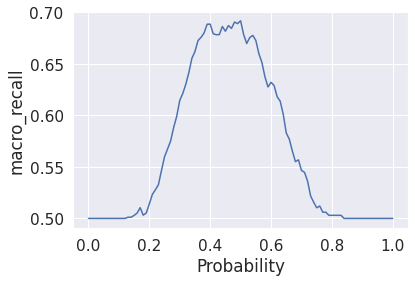

In [ ]:
#by changing the threshold values, we try to find the model with higher balanced accuracy
thresholds = np.linspace(0, 1, 101)

rf_scaled_macro_recalls = []
for t in thresholds:
    # Compute predictions at that threshold
    rf_scaled_oob_preds = rf_scaled_rf.oob_decision_function_[:,1] > t
    
    # Compute confusion matrix for those predictions
    rf_scaled_report = classification_report(y_train, rf_scaled_oob_preds, output_dict=True )
    
     # abstract the balance accuracy value
    rf_scaled_macro_recall = rf_scaled_report['macro avg']['recall']   
    
    # Add to our list
    rf_scaled_macro_recalls.append(rf_scaled_macro_recall)

#out put the graph and the list for the balance accuracy with different threshold
rf_scaled_macro_recalls_values = pd.Series(rf_scaled_macro_recalls, index = thresholds)
rf_scaled_macro_recalls_values.plot(xlabel = 'Probability', ylabel = 'macro_recall')
rf_scaled_macro_recalls_values.sort_values(ascending = False)

#### With the parameters found by the Grid research, we find that the best performance model has the balance accuracy of 0.73 with threshold on 0.45. The model does not perform better, so we still use the model in Method 1 with threshold t=0.18.

## 4. Gradient Boosting

In [ ]:
gb_scaled_boost = GradientBoostingClassifier(
    n_estimators = 100,   # Number of trees i.e. number of boosting steps to take
    learning_rate = 0.1,  # Learning rate. Set this to a small number to grow trees slowly.
    max_depth = 1,        # Parameters for the individual trees
    random_state= 22
)

In [ ]:
#use sample weight to deal with the imbalanced dataset
sample_weight = y.copy()

for value in y.value_counts().index:
    sample_weight[y == value] = 1/y.value_counts()[value]
    
sample_weight = sample_weight/sample_weight.sum()

# When do the train test split, we split sample_weight as well
X_train_std, X_test_std, y_train, y_test, sample_weight_train, sample_weight_test = train_test_split(X_std,y,sample_weight, test_size = 0.3, random_state=22, stratify=y)

gb_scaled_boost.fit(X_train_std, y_train, sample_weight = sample_weight_train) # <-- specify sample_weight when fitting

print("RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test,gb_scaled_boost.predict(X_test_std), output_dict=True))
print(f"GB_SCORE:\n{gb_scaled_boost.score(X_test_std, y_test)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_test,gb_scaled_boost.predict(X_test_std)):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test,gb_scaled_boost.predict(X_test_std))}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")

RESULTS: 
GB_SCORE:
0.7709750566893424
balanced accuracy score:
0.7554
CONFUSION MATRIX:
[[288  82]
 [ 19  52]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.938111   0.388060  0.770975    0.663085      0.849554
recall       0.778378   0.732394  0.770975    0.755386      0.770975
f1-score     0.850812   0.507317  0.770975    0.679065      0.795510
support    370.000000  71.000000  0.770975  441.000000    441.000000


### Grid search for Gradient Boosting

In [133]:
param_grid = {
    'max_depth': [1, 3, 5, 7],  
    'learning_rate' : [0.01, 0.1, 1],
    'n_estimators' : [50, 100, 500]
} 

gb_scaled_grid = GridSearchCV(gb_scaled_boost,      
                    param_grid, 
                    scoring = 'balanced_accuracy'
                   )

gb_scaled_grid.fit(X_train_std,y_train, sample_weight  = sample_weight_train) # <-- pass the sample weights here

gb_scaled_results = gb_scaled_grid.fit(X_train_std,y_train, sample_weight  = sample_weight_train)
#gb_scaled_results.sort_values(by = 'rank_test_score')

#out put the combination of best parameters
gb_scaled_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}

### Best GB!!

In [116]:
#rerun the model based on the combination of best parameters found by grid search
gb_scaled_boost = GradientBoostingClassifier(
    n_estimators = 500,   # Number of trees i.e. number of boosting steps to take
    learning_rate = 0.1,  # Learning rate. Set this to a small number to grow trees slowly.
    max_depth = 1,        # Parameters for the individual trees
    random_state= 22
)
gb_scaled_boost.fit(X_train_std, y_train, sample_weight = sample_weight_train)

print("RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test,gb_scaled_boost.predict(X_test_std), output_dict=True))
print(f"GB_SCORE:\n{gb_scaled_boost.score(X_test_std, y_test)}")
print(f"balanced accuracy score:\n{balanced_accuracy_score(y_test,gb_scaled_boost.predict(X_test_std)):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test,gb_scaled_boost.predict(X_test_std))}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")

RESULTS: 
GB_SCORE:
0.800453514739229
balanced accuracy score:
0.7900
CONFUSION MATRIX:
[[298  72]
 [ 16  55]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.949045   0.433071  0.800454    0.691058      0.865974
recall       0.805405   0.774648  0.800454    0.790027      0.800454
f1-score     0.871345   0.555556  0.800454    0.713450      0.820504
support    370.000000  71.000000  0.800454  441.000000    441.000000


In [119]:
gb_scaled_feature_importances=pd.Series(gb_scaled_boost.feature_importances_, index = X.columns).sort_values(ascending = False)
columns=['importance']
gb_scaled_feature_importances = pd.DataFrame(data=gb_scaled_feature_importances, columns=columns)
gb_scaled_feature_importances

,importance
OverTime,0.156360
StockOptionLevel,0.135892
MonthlyIncome,0.128584
JobLevel,0.083380
EnvironmentSatisfaction,0.051220
JobSatisfaction,0.039041
TotalWorkingYears,0.038699
DistanceFromHome,0.036876
Age,0.034021
NumCompaniesWorked,0.028101


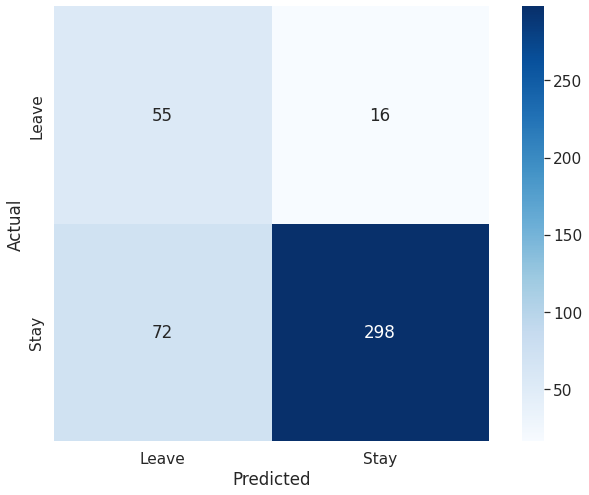

In [117]:
logreg_conf_matrix = confusion_matrix(y_test,gb_scaled_boost.predict(X_test_std))
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(logreg_conf_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

## Models Result Comparison

# Expected Value Framework

Let's make the following assumptions:

- **Attrition Cost** - The cost resulting primarily from lost productivity quantified as a function of salary and benefits. Assuming cost to be about $40k. (SHRM in the U.S. reported that it costs a firm six to nine months of an employee's salary to replace him or her)

- **Policy Change Cost** - The cost associated with reduction overtime given as percentage of attrition Cost. Can be cost related to something else as well based on our features causing attrition. Assuming reducing Overtime cost 20% of the attrition cost  i.e. $8k 

## Assuming Firm chooses to implement Revised Overtime policy for all,it costs the firm the below for each case
- If Stays (TN): \\$8000
- If Leaves(TP): \\$48000 (\\$40000 + \\$8000)
- If Predicted leave, but Stays: \\$8000
- If Predicted stay, but leaves: \\$48000 (\\$40000+\\$8000)

We will use all our models to see if we could have gotten better expected value (in this case least cost incurred) if we had only implemented the policy for High-Risk Employees and No policy at all.

In this case, the cost-benefit matrix takes the form:

$$ \begin{pmatrix} -8000 & -8000 \\ -48000 & -48000 \end{pmatrix}$$


In [120]:
cost_benefit_matrix = np.array([
    [-8000, -8000      ], 
    [-48000, -48000]])


def expected_value(y, y_pred):
    conf_mat = confusion_matrix(y, y_pred, labels = [True, False], normalize = 'all')
    return (conf_mat * cost_benefit_matrix).sum()


In [121]:
#Logistics Regression
conf_mat = confusion_matrix(y_test, y_test_lr, labels = [True, False], normalize = 'all')
print(conf_mat)

[[0.14058957 0.02040816]
 [0.23809524 0.60090703]]


In [122]:
#SVM
conf_mat = confusion_matrix(y_test, y_test_svm, labels = [True, False], normalize = 'all')
print(conf_mat)

[[0.13378685 0.02721088]
 [0.21315193 0.62585034]]


In [123]:
#Random Forest
conf_mat = confusion_matrix(y_train, rf_scaled_oob_preds, labels = [True, False], normalize = 'all')
print(conf_mat)

[[0.         0.16132167]
 [0.         0.83867833]]


In [124]:
#Gradient Boosting

conf_mat = confusion_matrix(y_test, gb_scaled_boost.predict(X_test_std), labels = [True, False], normalize = 'all')
print(conf_mat)

[[0.12471655 0.03628118]
 [0.16326531 0.67573696]]


In [125]:
cost_benefit=pd.DataFrame(columns=['LR','SVM','RF','GB'])
cost_benefit.loc[1]=[expected_value(y_test, y_test_lr),expected_value(y_test, y_test_svm),expected_value(y_train, rf_scaled_oob_preds),expected_value(y_test,gb_scaled_boost.predict(X_test_std))]
cost_benefit

,LR,SVM,RF,GB
1,-41560.090703,-41560.090703,-41547.133139,-41560.090703


### Assuming Firm chooses to 'not ' implement Revised Overtime policy at all, it costs the firm the below for each case
- If Stays (TN): \\$0
- If Leaves(TP): \\$40000
- If Predicted leave, but Stays: \\$0
- If Predicted stay, but leaves: \\$40000


In this case, the cost-benefit matrix takes the form:

$$ \begin{pmatrix} 0 & 0 \\ -40000 & -40000 \end{pmatrix}$$

In [126]:
cost_benefit_matrix = np.array([
    [0, 0      ], 
    [  -40000, -40000]])

cost_benefit=pd.DataFrame(columns=['LR','SVM','RF','GB'])
cost_benefit.loc[1]=[expected_value(y_test, y_test_lr),expected_value(y_test, y_test_svm),expected_value(y_train, rf_scaled_oob_preds),expected_value(y_test,gb_scaled_boost.predict(X_test_std))]
cost_benefit

,LR,SVM,RF,GB
1,-33560.090703,-33560.090703,-33547.133139,-33560.090703


### Assuming Firm chooses to implement Revised Overtime policy only for 'High-Risk Employee' , it costs the firm the below for each case
- If Stays (TN): \\$0
- If Leaves(TP): \\$48000
- If Predicted leave, but Stays: \\$8000
- If Predicted stay, but leaves: \\$40000


In this case, the cost-benefit matrix takes the form:

$$ \begin{pmatrix} 0 & -8000 \\ -40000 & -48000 \end{pmatrix}$$

In [127]:
cost_benefit_matrix = np.array([
    [0, -8000      ], 
    [  -40000, -48000]])

cost_benefit=pd.DataFrame(columns=['LR','SVM','RF','GB'])
cost_benefit.loc[1]=[expected_value(y_test, y_test_lr),expected_value(y_test, y_test_svm),expected_value(y_train, rf_scaled_oob_preds),expected_value(y_test,gb_scaled_boost.predict(X_test_std))]
cost_benefit

,LR,SVM,RF,GB
1,-38530.612245,-38784.580499,-41547.133139,-39256.235828


As we see the expected value is different for all the models in different scenarios. 

- For Policy change for everyone, Random Forest performs best as the Loss is least - \$41547 
- For No Policy change, Random Forest performs best with Loss = -\$33547
- For Policy changes only for targeted Employee,  Logistic Regression performs best with Loss = -\$38784

### **ROC-Curve**

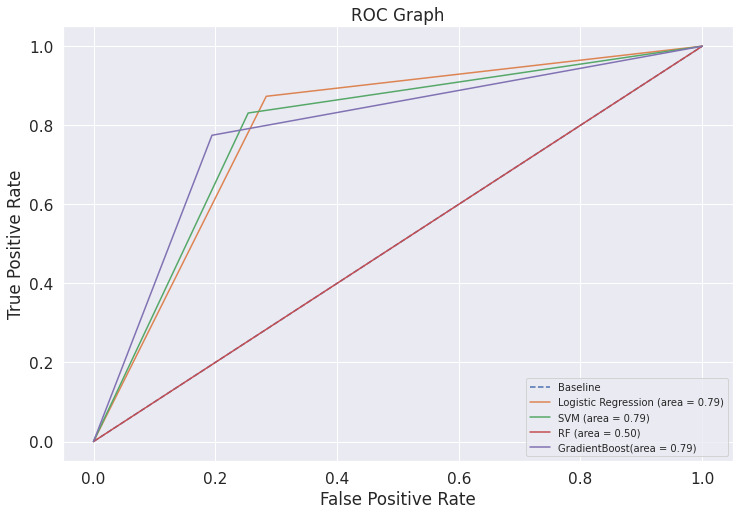

In [128]:
## ROC curve for all models
fig = plt.figure(figsize=(12,8))
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, y_test_lr)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, y_test_svm)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_train, rf_scaled_oob_preds)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test,gb_scaled_boost.predict(X_test_std))

plt.plot([0,1], [0,1],label='Baseline',linestyle='--')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)'%roc_auc_score(y_test, y_test_lr) )
plt.plot(svm_fpr, svm_tpr, label='SVM (area = %0.2f)' % roc_auc_score(y_test, y_test_svm))
plt.plot(rf_fpr, rf_tpr, label='RF (area = %0.2f)' % roc_auc_score(y_train, rf_scaled_oob_preds))
plt.plot(gb_fpr, gb_tpr, label='GradientBoost(area = %0.2f)' % roc_auc_score(y_test,gb_scaled_boost.predict(X_test_std)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop={'size':10}, loc='lower right')
plt.title('ROC Graph')
plt.show()


### Models Consolidate Result Table

In [129]:
from sklearn.metrics import f1_score
col = ['Algorithm', 'ROC AUC', 'RECALL','F1-SCORE', 'PRECISION']
results = pd.DataFrame(columns=col)
results.loc[1]=["LR",roc_auc_score(y_test, y_test_lr),recall_score(y_test, y_test_lr),f1_score(y_test, y_test_lr),precision_score(y_test, y_test_lr)]
results.loc[2]=['SVM',roc_auc_score(y_test, y_test_svm),recall_score(y_test, y_test_svm),f1_score(y_test, y_test_svm),precision_score(y_test, y_test_svm)]
results.loc[3]=["GB",roc_auc_score(y_test, gb_scaled_boost.predict(X_test_std)),recall_score(y_test, gb_scaled_boost.predict(X_test_std)),f1_score(y_test, gb_scaled_boost.predict(X_test_std)),
                        precision_score(y_test, gb_scaled_boost.predict(X_test_std))]
results.loc[4]=['RF',roc_auc_score(y_train, rf_scaled_oob_preds),recall_score(y_train, rf_scaled_oob_preds),f1_score(y_train, rf_scaled_oob_preds),precision_score(y_train, rf_scaled_oob_preds)]                                                         
results

,Algorithm,ROC AUC,RECALL,F1-SCORE,PRECISION
1,LR,0.794728,0.873239,0.521008,0.371257
2,SVM,0.788466,0.830986,0.526786,0.385621
3,GB,0.790027,0.774648,0.555556,0.433071
4,RF,0.500000,0.000000,0.000000,0.000000


In [130]:
#svm_coef=pd.DataFrame(svm2.coef_.transpose(), X.columns, columns=['svm2_coef'])\.sort_values(by='svm2_coef', ascending=False)
#pd.concat([LR_coef_odd, svm_coef], axis = 1)
LR_coef_odd

,LR_Odds_Ratio
OverTime,1.507138
YearsSinceLastPromotion,1.265378
MaritalStatus_Single,1.250358
DistanceFromHome,1.178598
JobRole_Sales Representative,1.177356
JobRole_Laboratory Technician,1.155742
NumCompaniesWorked,1.147631
EducationField_Technical Degree,1.085548
JobRole_Human Resources,1.082568
Gender,1.082154


In [131]:
import plotly.express as px
col=sns.color_palette("mako", 20).as_hex()[::-1]
feat=pd.DataFrame({"Importance": rf_scaled.feature_importances_}, index=X.columns
                 ).sort_values(by="Importance")
plot_df=feat.nlargest(10, columns='Importance').sort_values(by="Importance", ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y='Importance', text='Importance', 
             color=plot_df.index, opacity=0.7, color_discrete_sequence=col)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#3F3B3A'), 
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top 10 Most Important Predictors of Employee Attrition RF', 
                  coloraxis_showscale=False, showlegend=False,font_color="#303030", height = 500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance", 
                  xaxis = dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show(renderer="colab")

In [132]:
import plotly.express as px
col=sns.color_palette("mako", 20).as_hex()[::-1]
feat=pd.DataFrame({"Importance": gb_scaled_boost.feature_importances_}, index=X.columns
                 ).sort_values(by="Importance")
plot_df=feat.nlargest(10, columns='Importance').sort_values(by="Importance", ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y='Importance', text='Importance', 
             color=plot_df.index, opacity=0.7, color_discrete_sequence=col)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#3F3B3A'), 
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top 10 Most Important Predictors of Employee Attrition GB', 
                  coloraxis_showscale=False, showlegend=False,font_color="#303030", height = 500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance", 
                  xaxis = dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show(renderer="colab")